In [1]:
# making all the imports for the project
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

# Keras Librairies
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator, load_img

Using TensorFlow backend.


In [2]:
train_folder='./chest_Xray/train/'
val_folder='./chest_Xray/val/'
test_folder='./chest_Xray/test/'

In [3]:
# train
os.listdir(train_folder)
train_n = train_folder + 'NORMAL/'
train_p = train_folder + 'PNEUMONIA/'

In [4]:
# CNN Model building

cnn = Sequential()

# Convolution
cnn.add(Conv2D(32, (3,3), activation="relu", input_shape=(64,64,3)))

# Pooling
cnn.add(MaxPooling2D(pool_size = (2,2)))

# 2nd Convolution
cnn.add(Conv2D(32, (3,3), activation="relu"))

# 2 Pooling layer
cnn.add(MaxPooling2D(pool_size=(2,2)))

# Flatten the layer
cnn.add(Flatten())

# Fully Connected Layers
cnn.add(Dense(activation="relu", units=128))
cnn.add(Dense(activation="sigmoid", units=1))

# Compile the NN
cnn.compile(Adam(), loss="binary_crossentropy", metrics=["accuracy"])

In [5]:
# Fitting the CNN to the images and augmenting images

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip= True)

test_datagen = ImageDataGenerator(rescale=1./255) # Image normalization

training_set = train_datagen.flow_from_directory(train_folder,
                                                target_size=(64,64),
                                                batch_size = 10,
                                                class_mode = "binary")

validation_generator = test_datagen.flow_from_directory(val_folder,
                                                       target_size=(64,64),
                                                       batch_size=10,
                                                       class_mode="binary")

test_set = test_datagen.flow_from_directory(test_folder,
                                           target_size = (64,64),
                                           batch_size = 10,
                                           class_mode = "binary")

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [6]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [7]:
cnn_model = cnn.fit_generator(training_set,
                             epochs=5,
                             validation_data = validation_generator)

Epoch 1/5
522/522 [==============================] - 97s 185ms/step - loss: 0.3356 - accuracy: 0.8545 - val_loss: 0.7515 - val_accuracy: 0.6875
Epoch 2/5
522/522 [==============================] - 92s 176ms/step - loss: 0.2381 - accuracy: 0.9024 - val_loss: 0.5895 - val_accuracy: 0.8125
Epoch 3/5
522/522 [==============================] - 92s 175ms/step - loss: 0.2130 - accuracy: 0.9143 - val_loss: 0.4085 - val_accuracy: 0.8750
Epoch 4/5
522/522 [==============================] - 91s 175ms/step - loss: 0.1949 - accuracy: 0.9245 - val_loss: 0.3955 - val_accuracy: 0.5625
Epoch 5/5
522/522 [==============================] - 93s 178ms/step - loss: 0.1775 - accuracy: 0.9304 - val_loss: 0.2035 - val_accuracy: 0.8125


In [8]:
test_accu = cnn.evaluate_generator(test_set)

In [9]:
print("Testing accuracy is :", test_accu[1]*100, '%')

Testing accuracy is : 87.9807710647583 %


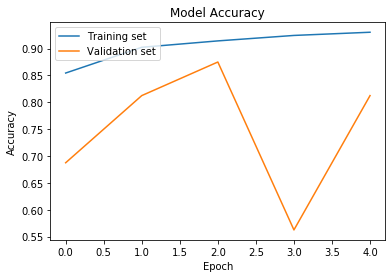

In [10]:
# Accuracy
plt.plot(cnn_model.history['accuracy'])
plt.plot(cnn_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

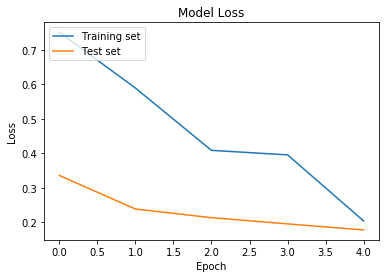

In [11]:
# Loss
plt.plot(cnn_model.history['val_loss'])
plt.plot(cnn_model.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()